# Régression linèaire Simple

## Exercice 1

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from google.colab import drive
drive.mount('/content/drive')
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def h(w,x):
    return w[0]+w[1]*x

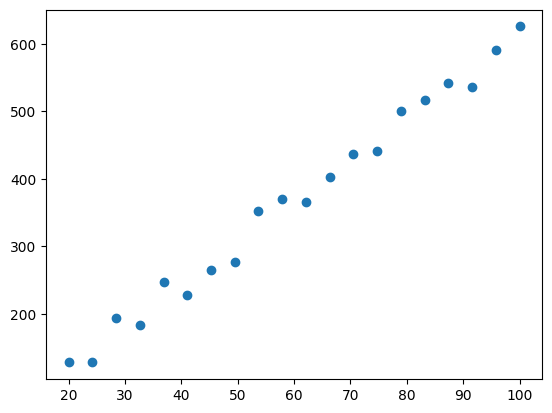

In [3]:
n=20
x=np.linspace(20,100,n)
noise=np.random.rand(n)*60-30
w=[2,6]
y=h(w,x) + noise
plt.scatter(x,y)
#plt.plot(x, w[0]+w[1]*x)

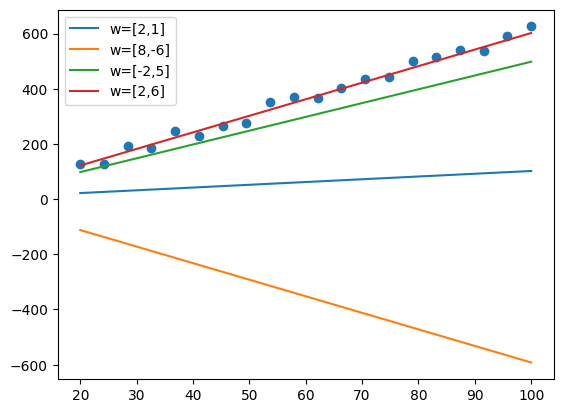

In [4]:
plt.scatter(x,y)
w=[2,1]
plt.plot(x,h(w,x),label="w=[2,1]")
w=[8,-6]
plt.plot(x,h(w,x),label="w=[8,-6]")
w=[-2,5]
plt.plot(x,h(w,x),label="w=[-2,5]")
w=[2,6]
plt.plot(x,h(w,x),label="w=[2,6]")
plt.legend()

In [5]:
def J(w,x):
    return (h(w,x)-y).dot(h(w,x)-y)/n

In [6]:
print(J([2,6],x))
print(J([2,1],x))
print(J([8,-6],x))
print(J([-2,5],x))

309.64544825764824
108952.08401950395
604308.0985366924
5813.031063158445


## 2- Moindres Carrés

In [7]:
def variance(x):
    return x.dot(x)/x.shape[0]-np.power(np.mean(x),2)

In [8]:
def covariance(x,y):
    return x.dot(y)/x.shape[0]-np.mean(x)*np.mean(y)

In [9]:
def ecart_type(x):
    return np.sqrt(variance(x))

In [10]:
def correlation(x,y):
    return covariance(x,y)/(ecart_type(x)*ecart_type(y))

In [11]:
x=np.array([2,4,14,8,12])
y=np.array([10,8,2,6,4])
print(variance(x), covariance(x,y), correlation(x,y))


20.799999999999997 -12.799999999999997 -0.9922778767136675


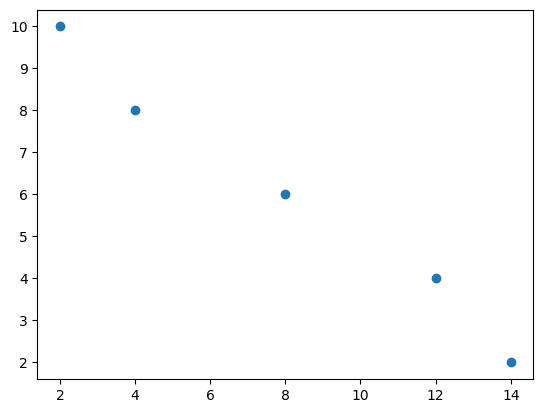

In [12]:
plt.scatter(x,y)

In [13]:
def moindres_carree(x,y):
    w1=covariance(x,y)/np.power(ecart_type(x),2)
    w0=np.mean(y)-w1*np.mean(x)
    return np.array([w0,w1])

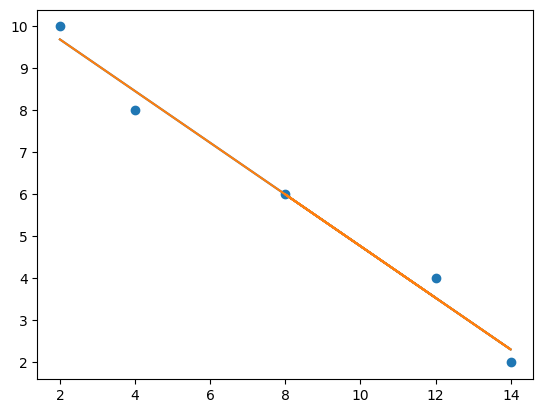

In [14]:
w=moindres_carree(x,y)
y1=w[0]+w[1]*x
y0=10.92307692-0.61538462*x
plt.plot(x,y0)
plt.plot(x,y1)
plt.scatter(x,y)

In [15]:
from scipy import linalg

In [16]:
x=np.array([2,4,6,8,12,15])
y=np.array([10,18,22,36,44,55])

n = x.shape[0]
ones = np.ones(n)

X = np.stack((ones,x)).T
Y = y.reshape((n,1))


In [17]:
w = linalg.inv((X.T.dot(X))).dot(X.T).dot(Y)
w

array([[3.87586207],
       [3.44137931]])

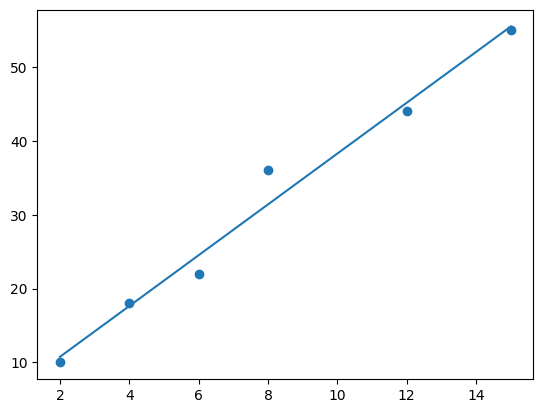

In [18]:
y0=w[0]+w[1]*x
plt.plot(x,y0)
plt.scatter(x,y)

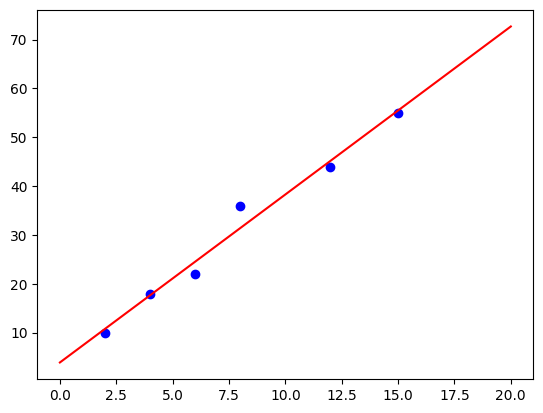

In [19]:
# x=np.array([2,4,14,8,12])
# y=np.array([10,8,2,6,4])

xx = np.linspace(0,20,20)
yy = w[0]+w[1]*xx

Y = Y.flatten()
plt.plot(xx,yy, color = "r",label = "model")
plt.scatter(x,y, color = "b", label = "Real")

In [20]:
def descente_grad(x,y,alpha,maxiter) :
    W=np.array([0.01,-0.01])

    m=x.shape[0]
    J=[]

    for i in range(maxiter) :
        ypred = W[0] + W[1]*x
        err = np.sum((ypred - y) **2)

        J.append(err/(2 * m))

        W[1] -= alpha * (ypred - y).dot(x) / m
        W[0] -= alpha * np.mean(ypred - y)

    return W,J

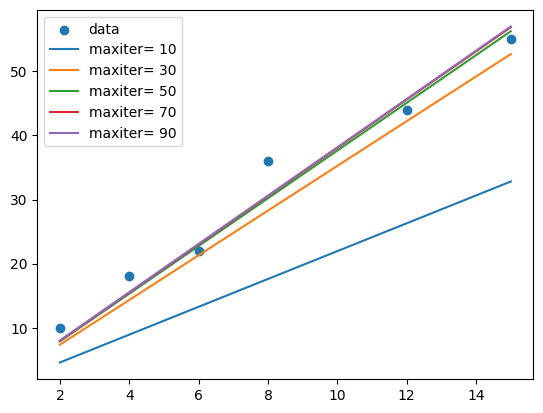

In [21]:
x=np.array([2,4,6,8,12,15])
y=np.array([10,18,22,36,44,55])
alpha = 0.001
maxiter=100

descente_grad(x,y,alpha,maxiter)
plt.scatter(x,y,label="data")

for maxiter in range(10,100,20) :
    W,J = descente_grad(x,y,alpha,maxiter)
    plt.plot(x,W[0] + W[1]*x,label = F"maxiter= {maxiter}")


# plt.plot(J)
plt.legend()

In [22]:

df = pd.read_csv('/content/drive/MyDrive/dataSet/data.csv')
df
h = np.array(["price","sqft_living"])
df1 = df[h]
XX = np.array(df1["sqft_living"])
YY = np.array(df1["price"])

XX = (XX - np.mean(XX)) / np.std(XX)
YY = (YY - np.mean(YY)) / np.std(YY)

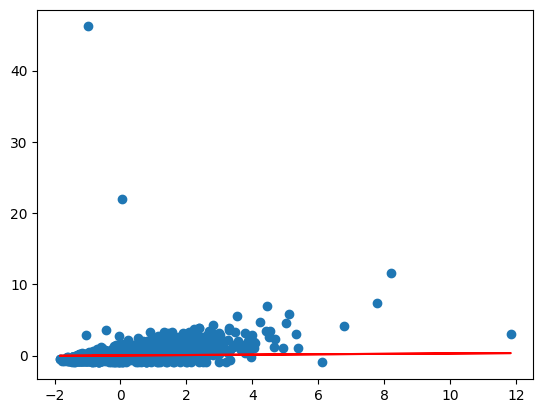

In [23]:
W,J = descente_grad(XX,YY,alpha,maxiter)
plt.scatter(XX,YY)
plt.plot(XX,W[0] + W[1]*XX, color = "r")

In [24]:
h = np.array(["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors"])
df2 = df[h]
X_vect = df2.values[:, 1:]
Y_vect = np.array(df2["price"])

X_vect =(X_vect - np.mean(X_vect) / np.std(X_vect))
Y_vect =(Y_vect - np.mean(Y_vect) / np.std(Y_vect))

# X_vect[0]
X_vect.shape

(4600, 5)

In [25]:
def compute_cost(x,y,W,W0) :
    m = x.shape[0]
    predictions = np.dot(x, W) + W0
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

In [26]:
W0 = 0.01
W = [0.01,0.01,0.01,0.01,0.01]
compute_cost(X_vect,Y_vect,W,W0)

311144966861.4215

In [27]:
def compute_gradient(x,y, W,W0):

    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_dw0 = 0.

    for i in range(m):
        err = (np.dot(x[i], W) + W0) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]
        dj_dw0 = dj_dw0 + err
    dj_dw = dj_dw / m
    dj_dw0 = dj_dw0 / m

    return dj_dw0, dj_dw

In [28]:
def gradient_descent(x, y, W, W0, compute_cost, compute_gradient, alpha, maxiter):

    J = []

    for i in range(maxiter):

        dj_dw0,dj_dw = compute_gradient(x, y, W, W0)

        W = W - alpha * dj_dw
        W0 = W0 - alpha * dj_dw0

        if i<100000:
            J.append( compute_cost(x, y, W, W0))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(maxiter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J[-1].item():8.2f} : W : {W} W0 : {W0}")


    return W, W0

In [33]:
init_W0 = 0.22
init_W = np.array([2.85, 2.218, 261.705, -0.6634, 0.27])
iterations = 2000
alpha = 0.000000001

w_final, w0_final = gradient_descent(X_vect, Y_vect, init_W, init_W0,compute_cost, compute_gradient, alpha, iterations)
print(f"W0,W Trouvee: {w0_final:0.2f},{w_final.tolist()} ")

predictions = np.dot(X_vect, w_final) + w0_final
# percentage_error = np.abs((predictions - Y_vect) / Y_vect) * 100kk fmmdl

r2 = r2_score(Y_vect, predictions)
print("score:", r2)

# print(f"Average prediction error: {percentage_error:.2f}%")

Iteration    0: Cost 129223191933.97 : W : [  2.84997419   2.21800006 261.70500101  -0.66348575   0.27000182] W0 : 0.22000197533595753
Iteration  200: Cost 129223191797.71 : W : [  2.84481248   2.21801214 261.70542979  -0.66346781   0.27036538] W0 : 0.22039712666379918
Iteration  400: Cost 129223191662.87 : W : [  2.83965043   2.218024   261.70560775  -0.66347227   0.2707288 ] W0 : 0.2207921803642771
Iteration  600: Cost 129223191528.15 : W : [  2.83448824   2.21803577 261.70568404  -0.66347409   0.27109217] W0 : 0.2211871946768216
Iteration  800: Cost 129223191393.46 : W : [  2.829326     2.21804751 261.70571899  -0.66347483   0.27145552] W0 : 0.22158219316571956
Iteration 1000: Cost 129223191258.77 : W : [  2.82416373   2.21805923 261.70573713  -0.66347514   0.27181886] W0 : 0.22197718541229702
Iteration 1200: Cost 129223191124.09 : W : [  2.81900146   2.21807094 261.70574844  -0.66347527   0.27218219] W0 : 0.22237217531235617
Iteration 1400: Cost 129223190989.40 : W : [  2.81383919 

In [38]:
h = np.array(["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors"])
df2 = df[h]
X = df2.values[:, 1:]
Y = np.array(df2["price"])

# X =(X - np.mean(X) / np.std(X))
# Y =(Y - np.mean(Y) / np.std(Y))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

reg = LinearRegression().fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.052842073771273035